以 sklearn 库为例，来讲解如何使用封装好的 KNN 算法，并在高斯数据集 gauss.csv 上观察分类效果。该数据集包含一些平面上的点，分别由两个独立的二维高斯分布随机生成，每一行包含三个数，依次是点的和坐标和类别

Import dataset and visualize it

the size of dataset: 200


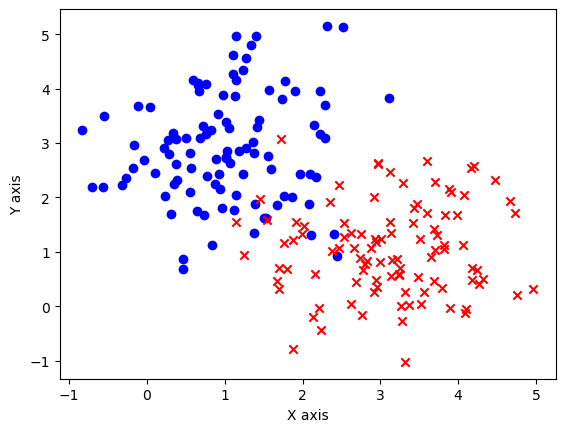

In [1]:
from sklearn.neighbors import KNeighborsClassifier # KNN classifier in sklearn
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import os

# Load Gaussian dataset
data = np.loadtxt('gauss.csv', delimiter=',')
x_train = data[:,:2]
y_train = data[:,2]
print("the size of dataset:", len(x_train))

# visualization
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In the Gaussian dataset, we use the entire dataset as the training set and other points on the plane as the testing set to observe the classification performance of KNN at different values.Therefore, we do no partition the dataset, but instead construct a grid on the plane with a spacing of 0.02 as the test set.Since the points on the plane are continuous, we cannot test them sequentially and can only sample from them like this.In the absence of special requirements, we generally use the simple uniform grid sampling method.Here, we choose a grid spacing of 0.02 to balance the number of test points and the representativense of the test point.Readers can also adjust this value to observe changes in the results.

In [2]:
# Set step size
step = 0.02
# Set grid boundaries
x_min, x_max = np.min(x_train[:,0]) - 1, np.max(x_train[:,0]) + 1
y_min, y_max = np.min(x_train[:,1]) - 1, np.max(x_train[:,1]) + 1
# Construct Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

In sklearn, the KNN classifier is defined by `KnerghborsClassfier` with parameter `n_neighbors` specify the size of $K$.We set $K=1,K=3$ and $K=10$ to observe the classification effect separately.The points in the dataset are represented in dark colors, while the points assigned to a certain category on the plane are represented in their corresponding light colors.It can be seen that as $K$ increases, the boundaries of classification become smoother, but the probability of misclassification also increases.

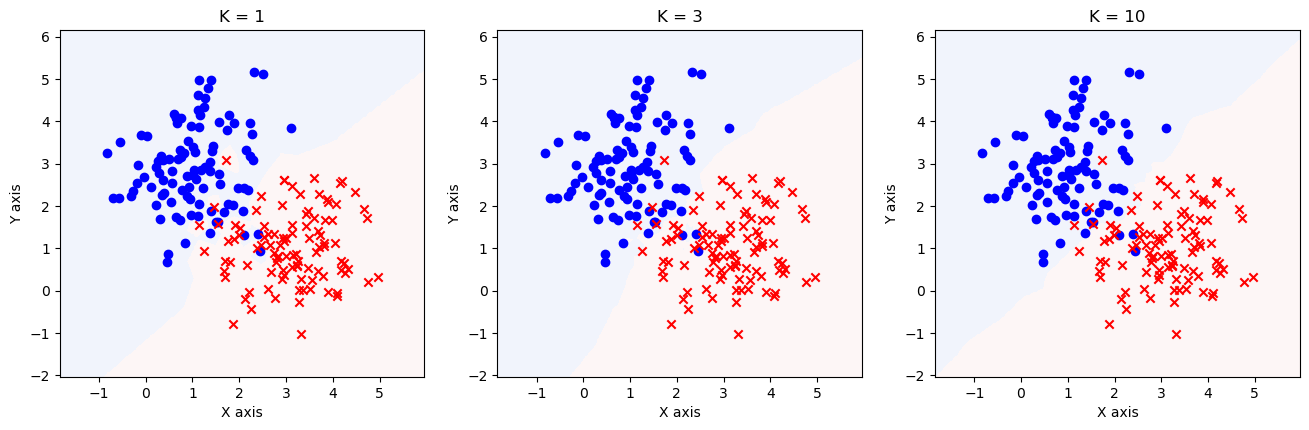

In [3]:
fig = plt.figure(figsize=(16, 4.5))
# you can adjust the K value, and observe the changes in the classification results
ks = [1, 3, 10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(ks):
    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(x_train, y_train)
    z = knn.predict(grid_data)
    
    # draw the result of classifier
    ax = fig.add_subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.07)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f"K = {k}")

plt.show()

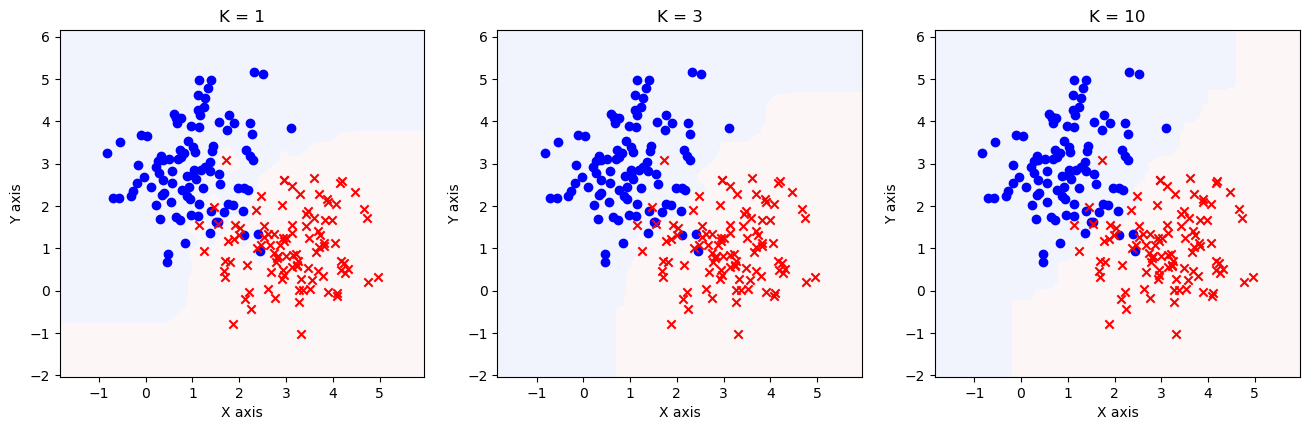

In [4]:
fig = plt.figure(figsize=(16, 4.5))
# you can adjust the K value, and observe the changes in the classification results
ks = [1, 3, 10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(ks):
    # define KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(x_train, y_train)
    z = knn.predict(grid_data)
    
    # draw the result of classifier
    ax = fig.add_subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.07)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f"K = {k}")

plt.show()